# AirBnB Berlin
This code is used to analyze the AirBnB Berlin dataset.
First, the data is loaded and transformed.
Then, visualizations are used to explore the dataset.
Finally, a supervised statistical learning method is used with the goal to predict the different average ratings of each apartement.

Questions to be answered:
1. Is there a structural difference in the overall scores in the neighborhoods of Berlin
2. What is the correlation profile of the overall scores? (What is it influencing the most)
3. Can we predict the indivdual scores and what are the key features?

## Load Packages & Data

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
import re

print("Packages loaded")

Packages loaded


In [10]:
# get the working directory
ws = os.getcwd()
#load package using ws & f string function
pd_listings = pd.read_csv(f"{ws}/listings.csv")

# subset only the columns that we need
pd_listings = pd_listings[[
                           'id', #for joining
                           'neighbourhood_group_cleansed', # plotting
                           'latitude', # plotting
                           'longitude', # plotting
                           'number_of_reviews', # cleaning (need reviews)
                           'review_scores_rating', # mb dont need
                           'review_scores_accuracy',# mb dont need
                           'review_scores_cleanliness',# mb dont need
                           'review_scores_checkin',# mb dont need
                           'review_scores_communication',# mb dont need
                           'review_scores_location',# mb dont need
                           'review_scores_value',# mb dont need
                           # predictie features
                           'bathrooms',
                           'bedrooms',
                           'beds',
                           'room_type',
                           'price',
                           'host_has_profile_pic',
                           'host_identity_verified',
                           'host_is_superhost',
                           'host_response_rate',
                           'neighborhood_overview', # change this to length
                           'description']] # change this to length
print('listings.csv loaded')

listings.csv loaded


In [11]:
pd_reviews = pd.read_csv(f"{ws}/reviews.csv")
pd_reviews = pd_reviews[['id','listing_id','date']]
print('reviews.csv loaded')

reviews.csv loaded


## Transfrom Data

In [12]:
# get rid of $ sign in price
pd_listings['price'] = pd_listings['price'].str.replace("[$, ]", "").astype("float")
# if there is no bathroom, set 0 instead of nan
pd_listings.at[pd_listings['bathrooms'].isnull(), 'bathrooms'] = 0
# if there is no bathroom, set 0 instead of nan
pd_listings.at[pd_listings['bedrooms'].isnull(), 'bedrooms'] = 0 # there are 6 that have no bedrooms
# if there is no bathroom, set 0 instead of nan
pd_listings.at[pd_listings['beds'].isnull(), 'beds'] = 0 # there's one listing for 1 guest, without any beds
# if there is no value, set 0% as string, as other also have a string
pd_listings.at[pd_listings['host_response_rate'].isnull(), 'host_response_rate'] = '0%' # there's one listing for 1 guest, without any beds
# then get rid of the % and make transfrom to float
pd_listings['host_response_rate'] = pd_listings['host_response_rate'].str.replace('%', "").astype("float")

In [13]:
# set all values which are nan to 0 
pd_listings.at[pd_listings['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
pd_listings.at[pd_listings['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
pd_listings.at[pd_listings['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
pd_listings.at[pd_listings['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
pd_listings.at[pd_listings['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
pd_listings.at[pd_listings['review_scores_location'].isnull(), 'review_scores_location'] = 0
pd_listings.at[pd_listings['review_scores_value'].isnull(), 'review_scores_value'] = 0

In [16]:
# change column so that it is easier to join later
pd_listings.rename(columns={'id':'listing_id'}, inplace=True)

In [15]:
# get rid of data that is not required (no reviews)
pd_listings = pd_listings[pd_listings.number_of_reviews != 0]
# also not interested in just "10s" or just "0s", as it might bias the data
pd_listings = pd_listings[pd_listings.review_scores_rating != 100]
pd_listings = pd_listings[pd_listings.review_scores_rating != 0]

In [17]:
# feature engineering: get the length of the text of the description & neighborhood
pd_listings['description_len'] = pd_listings.description.str.len()
pd_listings.at[pd_listings['description_len'].isnull(), 'description_len'] = 0

pd_listings['neighborhood_overview_len'] = pd_listings.neighborhood_overview.str.len()
pd_listings.at[pd_listings['neighborhood_overview_len'].isnull(), 'neighborhood_overview_len'] = 0

In [ ]:
print('listings.csv transformed into pd_listings')

In [18]:
# change the date from sting to datetime
pd_reviews['date'] = pd.to_datetime(pd_reviews['date'])

In [19]:
print('reviews.csv loaded into pd_reviews')

listings.csv transformed into pd_listings


## Visualize the data
Is there a regional difference in the areas?

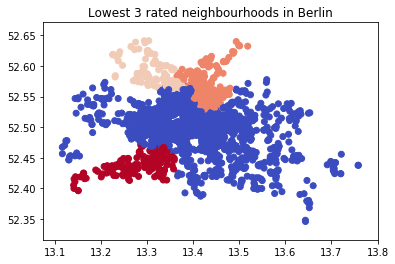

In [35]:
# plotting the highest three
pd_listings_score = pd_listings[['listing_id','review_scores_rating']].groupby(['listing_id']).sum()
# select and group by neighborhood
pd_neighbourhood_score = pd_listings[['neighbourhood_group_cleansed','review_scores_value']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('review_scores_value', ascending=False)
pd_listings_plot_score = pd_listings[['neighbourhood_group_cleansed','longitude','latitude','review_scores_value']]
pd_listings_plot_score.loc[:,'color'] = 0
color_value = 1

#set the color for the lowest three
for neighbourhood in pd_neighbourhood_score[0:3].index:
  pd_listings_plot_score.at[pd_listings_plot_score['neighbourhood_group_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2
    
plt.figure()
ax = plt.subplot(1, 1, 1)
ax.set_title("Lowest 3 rated neighbourhoods in Berlin")

ax.set_autoscaley_on(True)
ax.set_autoscalex_on(True)

plt.scatter(pd_listings_plot_score['longitude'],
            pd_listings_plot_score['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot_score['color']
           )

_ = plt.plot()

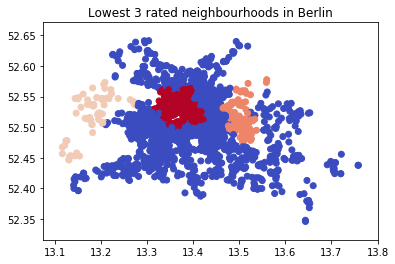

In [33]:
# plotting the lowest three
pd_listings_score = pd_listings[['listing_id','review_scores_rating']].groupby(['listing_id']).sum()
# select and group by neighborhood
pd_neighbourhood_score = pd_listings[['neighbourhood_group_cleansed','review_scores_value']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('review_scores_value', ascending=False)
pd_listings_plot_score = pd_listings[['neighbourhood_group_cleansed','longitude','latitude','review_scores_value']]
pd_listings_plot_score.loc[:,'color'] = 0
color_value = 1

#set the color for the lowest three
for neighbourhood in pd_neighbourhood_score[9:12].index:
  pd_listings_plot_score.at[pd_listings_plot_score['neighbourhood_group_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2
    
plt.figure()
ax = plt.subplot(1, 1, 1)
ax.set_title("Lowest 3 rated neighbourhoods in Berlin")

ax.set_autoscaley_on(True)
ax.set_autoscalex_on(True)

plt.scatter(pd_listings_plot_score['longitude'],
            pd_listings_plot_score['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot_score['color']
           )

_ = plt.plot()

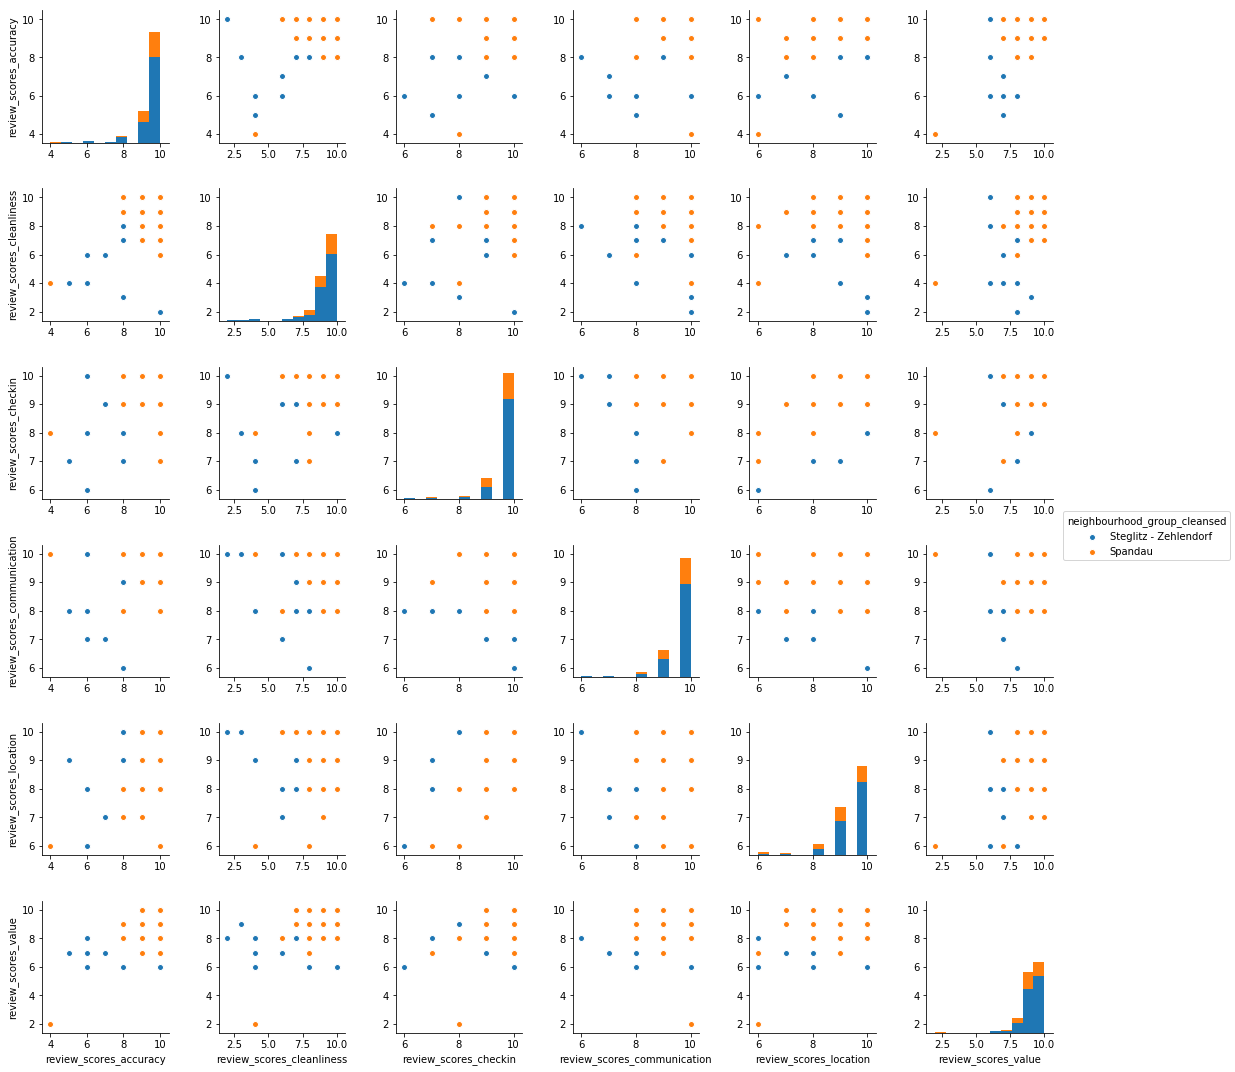

In [36]:
# compare the lowest and highest rated region based on the individual scores
scores_top_bottom = pd_listings[(pd_listings.neighbourhood_group_cleansed == 'Steglitz - Zehlendorf') | (pd_listings.neighbourhood_group_cleansed == 'Spandau')]
sns.pairplot(scores_top_bottom[['neighbourhood_group_cleansed',
                                'review_scores_accuracy',
                                'review_scores_cleanliness',
                                'review_scores_checkin',
                                'review_scores_communication',
                                'review_scores_location',
                                'review_scores_value']], hue = 'neighbourhood_group_cleansed')

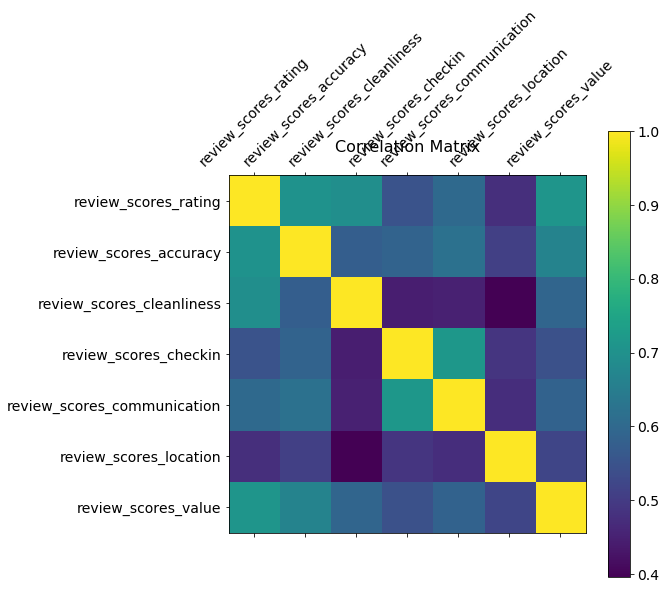

In [37]:
# plot the correlation of the individual scores in a heatmap

# get the correlation
corr_scores = pd_listings[['review_scores_rating',
         'review_scores_accuracy',
                           'review_scores_cleanliness',
                           'review_scores_checkin',
                           'review_scores_communication',
                           'review_scores_location',
                           'review_scores_value']].corr()

f = plt.figure(figsize=(8, 8))
corr_scores.style.background_gradient(cmap='coolwarm')
plt.matshow(corr_scores, fignum=f.number)
plt.xticks(range(corr_scores.shape[1]), corr_scores.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_scores.shape[1]), corr_scores.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Supervised Statistical Learning Model
Fit a linear model first. The predicted scores are numeric, although of course the value space is restricted...

In [38]:
# prep data, normalise, one-hot and split to train and testset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [39]:
pd_model_data_x = pd_listings[['bathrooms',
                               'bedrooms',
                               'beds',
                               'room_type',
                               'price',
                               'host_has_profile_pic',
                               'host_identity_verified',
                               'host_is_superhost',
                               'host_response_rate',
                               'neighbourhood_group_cleansed',
                               'neighborhood_overview_len',
                               'description_len']]

In [40]:
# simple transformations to get bathrooms, bedrooms, beds between 0 & 1
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])
pd_model_data_x['beds'] = min_max_scaler.fit_transform(pd_model_data_x[['beds']])

In [41]:
pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed',
                                                           'room_type',
                                                           'host_is_superhost',
                                                           'host_has_profile_pic',
                                                           'host_identity_verified'])

In [42]:
# fit the following for each model
pd_model_data_y = pd_listings['review_scores_accuracy']
#pd_model_data_y = pd_listings['review_scores_cleanliness']
#pd_model_data_y = pd_listings['review_scores_checkin']
#pd_model_data_y = pd_listings['review_scores_communication']
#pd_model_data_y = pd_listings['review_scores_location']
#pd_model_data_y = pd_listings['review_scores_value']

In [43]:
# train and test - x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.10, random_state=789)

In [44]:
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

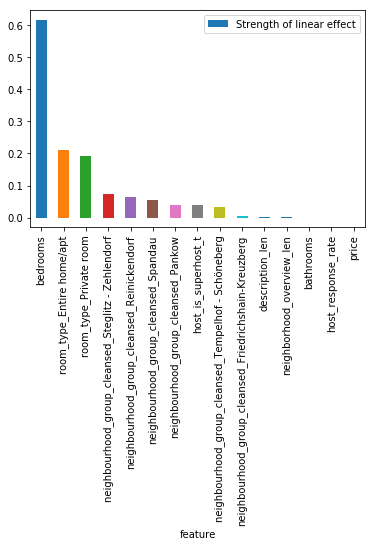

In [45]:
coefficients = pd.DataFrame({'feature': X_train.columns, 'Strength of linear effect': lm.coef_})
_ = coefficients.sort_values('Strength of linear effect', ascending=False)[:15].plot(x='feature', y='Strength of linear effect', kind='bar')

Based on the linear regression results, we fit a penalized regression model, as we likely have correlation in our predictors, which lead to illogical results.

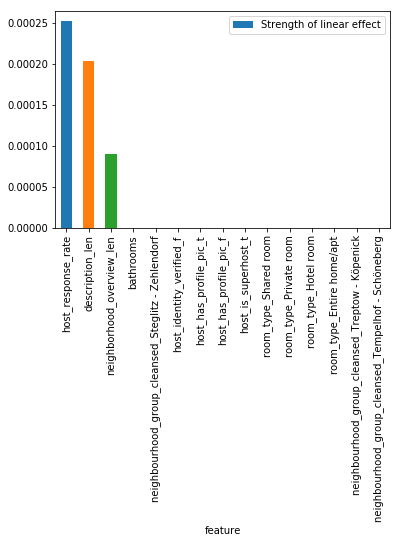

In [48]:
from sklearn.linear_model import LassoCV
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.10, random_state=789)
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
reg.fit(X_train, y_train)

coef_lasso = pd.DataFrame({'feature': X_train.columns, 'Strength of linear effect': reg.coef_})
_ = coef_lasso.sort_values('Strength of linear effect', ascending=False)[:15].plot(x='feature', y='Strength of linear effect', kind='bar')

# the result makes sense. Yet, the coefficients are very small

(-0.50985663082437271,
 10.509856630824371,
 9.2594913743050373,
 20.279204635953782)

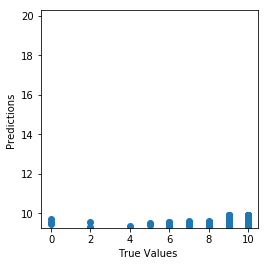

In [49]:
forecast_lasso = reg.predict(X_test)

g=plt.scatter(y_test, forecast_lasso)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

# as seen in the strenght of the slopes, the model can not predict low values. 